In [1]:
from astropy.table import Table
from scipy.stats import zscore
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import sys
import os
from scipy.stats import gaussian_kde
from livelossplot import PlotLossesKeras
import numpy as np
import json
import urllib
import re
sns.set(style="darkgrid")

In [2]:
from utils import *
set_seed(0)

Random seed set as 0


In [2]:
df_h = Table.read('/content/drive/MyDrive/BCU Classification/table-4LAC-DR3-h.fits')
df_h = df_h.to_pandas()
df_h = df_h[df_h['Flags']==0]

df_l = Table.read('/content/drive/MyDrive/BCU Classification/table-4LAC-DR3-l.fits')
df_l = df_l.to_pandas()
df_l = df_l[df_l['Flags']==0]

In [3]:
df_h.head()

,Source_Name,DataRelease,RAJ2000,DEJ2000,GLON,GLAT,Signif_Avg,Flux1000,Unc_Flux1000,Energy_Flux100,...,HE_EPeak,Unc_HE_EPeak,HE_nuFnuPeak,Unc_HE_nuFnuPeak,nu_syn,nuFnu_syn,Variability_Index,Frac_Variability,Unc_Frac_Variability,Highest_energy
0,b'4FGL J0001.2+4741',1,0.3126,47.685902,114.250198,-14.338059,4.692600,1.259796e-10,2.877197e-11,1.499454e-12,...,NaN,NaN,-inf,-inf,1.000000e+14,3.716456e-13,25.313953,0.675882,0.312850,65.575203
1,b'4FGL J0001.2-0747',1,0.3151,-7.797100,89.032722,-67.305008,23.782486,7.471219e-10,5.041939e-11,8.339171e-12,...,796.297852,766.797424,8.686245e-07,7.492923e-08,9.120108e+13,1.936770e-12,46.780693,0.406565,0.111870,86.975197
2,b'4FGL J0001.4-0010',3,0.3717,-0.169900,96.891991,-60.491329,4.900018,1.082246e-10,2.914440e-11,1.231385e-12,...,15475.512695,18471.714844,1.494930e-07,8.294155e-08,3.609939e+12,2.473256e-13,9.272764,0.000000,10.000000,30.056200
3,b'4FGL J0001.5+2113',1,0.3815,21.218300,107.649353,-40.167652,54.653084,1.347354e-09,6.172809e-11,2.555889e-11,...,65.680008,18.915735,8.844835e-06,8.229393e-07,1.584893e+14,1.152471e-12,1910.935791,0.996138,0.213478,-inf
5,b'4FGL J0001.8-2153',3,0.4647,-21.886499,55.184696,-77.572540,4.578068,9.047530e-11,2.442527e-11,1.061114e-12,...,6281.065430,2626.445068,1.545364e-07,5.278574e-08,1.659588e+13,9.716011e-13,24.557972,0.902851,0.380107,-inf


In [4]:
df_l.head()

,Source_Name,DataRelease,RAJ2000,DEJ2000,GLON,GLAT,Signif_Avg,Flux1000,Unc_Flux1000,Energy_Flux100,...,HE_EPeak,Unc_HE_EPeak,HE_nuFnuPeak,Unc_HE_nuFnuPeak,nu_syn,nuFnu_syn,Variability_Index,Frac_Variability,Unc_Frac_Variability,Highest_energy
0,b'4FGL J0012.0+7043',1,3.0032,70.732597,119.661102,8.111637,9.391647,4.022406e-10,4.989643e-11,5.202780e-12,...,NaN,NaN,-inf,-inf,5.754399e+12,5.482871e-13,18.997129,0.381762,0.192456,-inf
1,b'4FGL J0014.7+5801',1,3.6867,58.027199,118.074745,-4.498106,10.829500,1.763550e-10,4.287831e-11,2.571515e-12,...,30467.089844,17695.964844,5.071456e-07,1.101557e-07,0.000000e+00,0.000000e+00,11.195417,0.099530,0.650253,160.817001
2,b'4FGL J0014.8+6118',1,3.7212,61.303699,118.557297,-1.257189,17.677473,7.848316e-10,7.590142e-11,6.474739e-12,...,5067.017578,1501.950317,9.392241e-07,9.292127e-08,2.089296e+13,1.480430e-12,12.274307,0.000000,10.000000,-inf
3,b'4FGL J0015.6+5551',1,3.9071,55.863602,117.888100,-6.657064,13.679805,3.372334e-10,4.716959e-11,4.016745e-12,...,NaN,NaN,-inf,-inf,5.688530e+15,7.878908e-12,11.952563,0.136779,0.318575,167.578003
6,b'4FGL J0035.9+5950',1,8.9823,59.833401,120.982048,-2.979620,68.426636,3.081422e-09,9.592344e-11,3.706086e-11,...,98809.250000,65159.152344,5.909368e-06,5.170865e-07,1.122018e+17,1.493479e-11,252.022751,0.494519,0.109907,372.923004


In [5]:
classification_df = pd.concat([df_h, df_l], ignore_index=True)
classification_df['CLASS'] = classification_df['CLASS'].str.decode('utf-8')
classification_df['CLASS'] = classification_df['CLASS'].str.upper()
classification_df = classification_df[classification_df['CLASS'].isin(['BLL', 'FSRQ', 'BCU'])]

selected_columns = ['PL_Index', 'nu_syn', 'LP_Index', 'Pivot_Energy', 'Frac_Variability', 'Variability_Index', 'nuFnu_syn', 'CLASS']
target = 'CLASS'
feature_columns = [ele for ele in selected_columns if ele is not 'CLASS']


classification_df = classification_df[selected_columns]

classification_df

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-5-6a33a8dc7af4>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  feature_columns = [ele for ele in selected_columns if ele is not 'CLASS']


,PL_Index,nu_syn,LP_Index,Pivot_Energy,Frac_Variability,Variability_Index,nuFnu_syn,CLASS
0,2.271696,1.000000e+14,2.254081,2420.575195,0.675882,25.313953,3.716456e-13,BCU
1,2.116692,9.120108e+13,2.078927,1721.603882,0.406565,46.780693,1.936770e-12,BLL
2,1.939160,3.609939e+12,1.661223,4307.082520,0.000000,9.272764,2.473256e-13,BLL
3,2.654060,1.584893e+14,2.514159,329.773743,0.996138,1910.935791,1.152471e-12,FSRQ
4,1.876663,1.659588e+13,1.716620,4429.934082,0.902851,24.557972,9.716011e-13,BCU
...,...,...,...,...,...,...,...,...
3169,2.071567,3.311315e+13,2.042366,5897.854004,0.328630,14.602383,1.006315e-12,BCU
3170,2.226648,0.000000e+00,1.962429,3114.226318,1.071415,34.235767,0.000000e+00,BCU
3171,2.045913,0.000000e+00,2.019132,5066.525391,0.337927,22.359163,0.000000e+00,BCU
3172,1.810977,1.566751e+16,1.736923,1910.885742,0.201833,58.688427,1.279994e-11,BLL


In [8]:
bcu_samples = classification_df[classification_df['CLASS'].isin(['BCU'])]
classification_df = classification_df[~classification_df['CLASS'].isin(['BCU'])]

print(classification_df.shape)
print(bcu_samples.shape)

(2005, 8)
(1115, 8)


In [9]:
class_mapping = {'BLL': 0, 'FSRQ': 1}
classification_df['CLASS'] = classification_df['CLASS'].map(class_mapping)

<ipython-input-9-23a26e19f24f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_df['CLASS'] = classification_df['CLASS'].map(class_mapping)


In [10]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, OrdinalEncoder

In [11]:
transformer = make_column_transformer(
    (StandardScaler(),
        feature_columns)
)

In [12]:
features = classification_df.drop([target], axis=1)
labels = classification_df[target]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=42)

In [15]:
X_train.to_csv('train_samples.csv', index=False)
X_val.to_csv('val_samples.csv', index = False)
X_test.to_csv('test_samples.csv', index = False)
y_train.to_csv('train_labels.csv', index = False)
y_test.to_csv('test_labels.csv', index = False)
y_val.to_csv('val_labels.csv', index = False)
bcu_samples.to_csv('bcu_samples.csv', index = False)

In [16]:
transformer.fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)
X_val = transformer.transform(X_val)
bcu_samples = transformer.transform(bcu_samples)

In [17]:
np.save('X_train.npy', X_train)
np.save('X_val.npy', X_val)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_val.npy', y_val)
np.save('y_test.npy', y_test)
np.save('bcu_samples.npy', bcu_samples)

In [18]:
X_train = np.load('X_train.npy')
X_val = np.load('X_val.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_val = np.load('y_val.npy')
y_test = np.load('y_test.npy')
bcu_samples = np.load('bcu_samples.npy')

In [3]:
X_train = np.load('./classification_data/X_train.npy')
X_val = np.load('./classification_data/X_val.npy')
X_test = np.load('./classification_data/X_test.npy')
y_train = np.load('./classification_data/y_train.npy')
y_val = np.load('./classification_data/y_val.npy')
y_test = np.load('./classification_data/y_test.npy')
bcu_samples = np.load('./classification_data/bcu_samples.npy')

In [19]:
bll, fsrq = np.bincount(y_train)
print(bll)
print(fsrq)

1053
551


In [4]:
X_train.shape,y_train.shape

((1604, 7), (1604,))

In [21]:
X_train[0]

array([ 0.85295165, -0.09814737,  0.71171683, -0.7151801 , -0.27865052,
       -0.17254569,  0.11640763], dtype=float32)

## Autoencoder Pretext

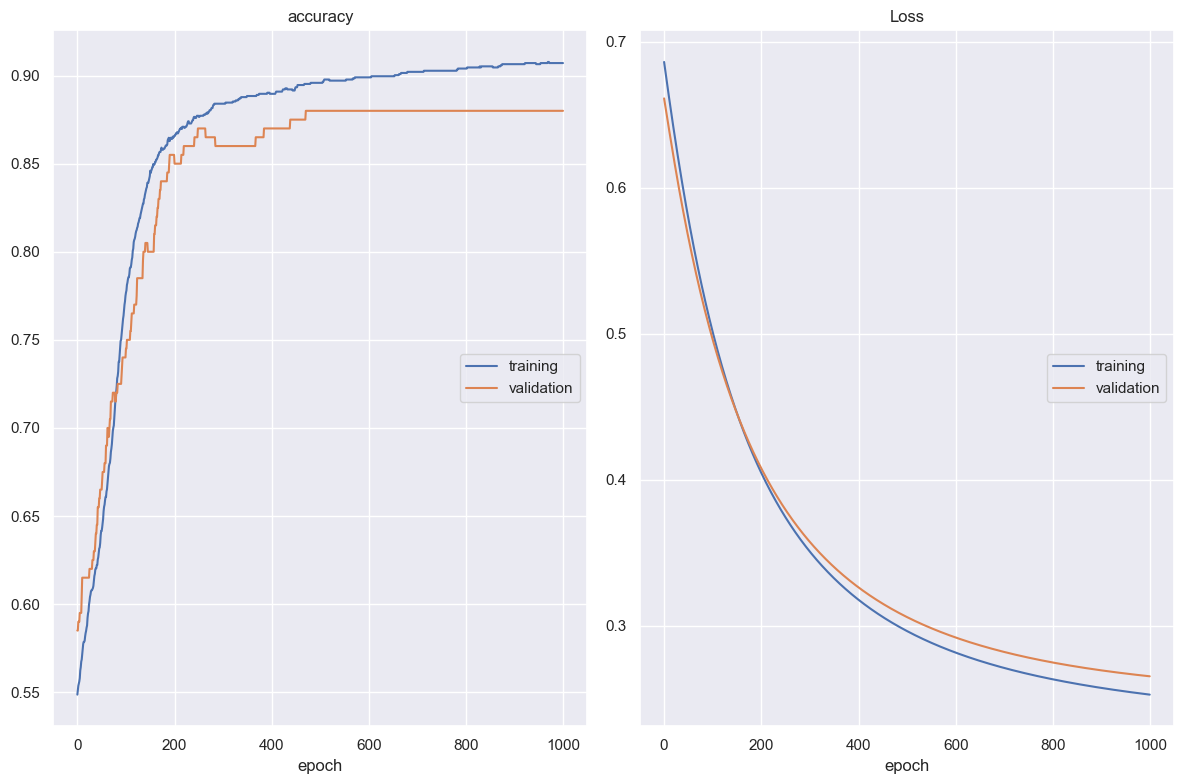

accuracy
	training         	 (min:    0.549, max:    0.908, cur:    0.907)
	validation       	 (min:    0.585, max:    0.880, cur:    0.880)
Loss
	training         	 (min:    0.253, max:    0.686, cur:    0.253)
	validation       	 (min:    0.265, max:    0.661, cur:    0.265)

Epoch 01000: saving model to ./ssl_ckpt_no_dropout\weights_epoch_1000.h5


In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split
import numpy as np

# Define the self-supervised model architecture
input_layer = Input(shape=(7,))
#encoder = Dense(128, activation='relu')(input_layer)
encoder = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoder)
decoder = Dense(64, activation='relu')(encoded)
#decoder = Dense(128, activation='relu')(decoder)
decoded = Dense(7, activation='linear')(decoder)  # Reconstruction layer

# Create the encoder model (used for self-supervised task)
encoder_model = Model(inputs=input_layer, outputs=encoded)

# Create the full self-supervised model (including reconstruction loss)
self_supervised_model = Model(inputs=input_layer, outputs=decoded)

# Compile the self-supervised model with a loss function (reconstruction loss)
self_supervised_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the self-supervised model on the data
self_supervised_model.fit(X_train, X_train, epochs=300, batch_size=2048, validation_data=(X_val, X_val), callbacks=[PlotLossesKeras()])


encoder_model.save_weights('./ssl_encoder.h5')
# Extract encoded features from the encoder model
encoded_features_train = encoder_model.predict(X_train)
encoded_features_val = encoder_model.predict(X_val)

# Now you can use the encoded features as inputs for a classification head
classification_input_layer = Input(shape=(32,))  # Use the appropriate size of encoded features
#classification_input_layer_1 =  tf.keras.layers.Dropout(0.25)(classification_input_layer)
classification_output_layer = Dense(1, activation='sigmoid')(classification_input_layer)

classification_model = Model(inputs=classification_input_layer, outputs=classification_output_layer)
classification_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_path = './ssl_ckpt_no_dropout/' + 'weights_epoch_{epoch:02d}.h5'
ckpt = tf.keras.callbacks.ModelCheckpoint(
        checkpoint_path,
        monitor='val_loss',
        verbose=1,
        save_best_only=False,
        save_weights_only=True,
        mode='min',
        save_freq='epoch'
    )

# Train the classification model on the encoded features
classification_model.fit(encoded_features_train, y_train, epochs=1000, batch_size=2048, validation_data=(encoded_features_val, y_val), callbacks=[PlotLossesKeras(), ckpt])


In [5]:
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score, f1_score, precision_score, recall_score
from tqdm import tqdm
best_auc = 0
best_accuracy = 0
best_f1 = 0
best_f1_0 = 0
best_f1_1 = 0
best_precision = 0
best_pr_0 = 0
best_pr_1 = 0
best_recall = 0
best_r0 = 0
best_r1 = 0
best_weights = {
    'auc': None, 
    'accuracy': None, 
    'f1':None, 
    'f1_0':None, 
    'f1_1':None,
    'precision': None,
    'r0': None,
    'r1': None,
    'pr_0':None,
    'pr_1':None,
    'recall': None
}
encoded_features_test = encoder_model.predict(X_test, verbose=0)
for epoch in tqdm(range(len(os.listdir('./ssl_ckpt_no_dropout/')))):
    weights_path = f"./ssl_ckpt_no_dropout/weights_epoch_{epoch+1:02d}.h5"
    classification_model.load_weights(weights_path)
    
    # Evaluate the model
    predictions = classification_model.predict(encoded_features_test,verbose=0)
    roc_auc = roc_auc_score(y_test, predictions)
    accuracy = accuracy_score(y_test, np.round(predictions))
    f1_0 = f1_score(y_test, np.round(predictions), pos_label=0)
    f1_1 = f1_score(y_test, np.round(predictions), pos_label=1)
    f1 = f1_score(y_test, np.round(predictions), average='weighted')
    precision = precision_score(y_test, np.round(predictions), average='weighted')
    pr_0 = precision_score(y_test, np.round(predictions), pos_label=0)
    pr_1 = precision_score(y_test, np.round(predictions), pos_label=1)
    recall = recall_score(y_test, np.round(predictions), average='weighted')
    r0 = recall_score(y_test, np.round(predictions), pos_label=0)
    r1 = recall_score(y_test, np.round(predictions), pos_label=1)
    
    #accuracy = standard_nn_classifier.evaluate(X_test, y_test, verbose=0)[1]
    
    if roc_auc > best_auc:
        best_auc = roc_auc
        best_weights['auc'] = weights_path
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_weights['accuracy'] = weights_path
    if f1 > best_f1:
        best_f1 = f1
        best_weights['f1'] = weights_path
    if f1_0 > best_f1_0:
        best_f1_0 = f1_0
        best_weights['f1_0'] = weights_path
    if f1_1 > best_f1_1:
        best_f1_1 = f1_1
        best_weights['f1_1'] = weights_path
    if precision > best_precision:
        best_precision = precision
        best_weights['precision'] = weights_path
    if pr_0 > best_pr_0:
        best_pr_0 = pr_0 
        best_weights['pr_0'] = weights_path
    if pr_1 > best_pr_1:
        best_pr_1 = pr_1 
        best_weights['pr_1'] = weights_path
    if r0 > best_r0:
        best_r0 = r0 
        best_weights['r0'] = weights_path
    if r1 > best_r1:
        best_r1 = r1 
        best_weights['r1'] = weights_path
    if recall > best_recall:
        best_recall = recall
        best_weights['recall'] = weights_path

print("Best ROC AUC:", round(best_auc,2))
print("Best accuracy:", round(best_accuracy,2))
print("Best PR(0):", round(best_pr_0,2))
print("Best R(0):", round(best_r0,2))
print("Best F1(0):", round(best_f1_0,2))
print("Best PR(1):", round(best_pr_1,2))
print("Best R(1):", round(best_r1,2))
print("Best F1(1):", round(best_f1_1,2))
print("Best F1:", round(best_f1,2))
print('Best precision:', round(best_precision,2))
print('Best recall:', round(best_recall,2))
print(best_weights)

 67%|██████▋   | 1000/1500 [00:57<00:29, 16.70it/s]c:\Users\abhim\anaconda3\envs\sdss\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abhim\anaconda3\envs\sdss\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abhim\anaconda3\envs\sdss\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abhim\anacon

Best ROC AUC: 0.95
Best accuracy: 0.89
Best PR(0): 0.94
Best R(0): 1.0
Best F1(0): 0.92
Best PR(1): 0.78
Best R(1): 0.86
Best F1(1): 0.82
Best F1: 0.89
Best precision: 0.9
Best recall: 0.89
{'auc': './ssl_ckpt_no_dropout/weights_epoch_990.h5', 'accuracy': './ssl_ckpt_no_dropout/weights_epoch_680.h5', 'f1': './ssl_ckpt_no_dropout/weights_epoch_680.h5', 'f1_0': './ssl_ckpt_no_dropout/weights_epoch_680.h5', 'f1_1': './ssl_ckpt_no_dropout/weights_epoch_680.h5', 'precision': './ssl_ckpt_no_dropout/weights_epoch_680.h5', 'r0': './ssl_ckpt_no_dropout/weights_epoch_1001.h5', 'r1': './ssl_ckpt_no_dropout/weights_epoch_648.h5', 'pr_0': './ssl_ckpt_no_dropout/weights_epoch_680.h5', 'pr_1': './ssl_ckpt_no_dropout/weights_epoch_680.h5', 'recall': './ssl_ckpt_no_dropout/weights_epoch_680.h5'}


In [7]:
from sklearn.metrics import roc_auc_score, classification_report
classification_model.load_weights('./ssl_ckpt_no_dropout/weights_epoch_680.h5')
predictions = classification_model.predict(encoded_features_test)
print(roc_auc_score(y_test, predictions))
print(classification_report(y_test, np.round(predictions), digits = 3))

0.9491525423728814
              precision    recall  f1-score   support

           0      0.941     0.901     0.921       142
           1      0.785     0.864     0.823        59

    accuracy                          0.891       201
   macro avg      0.863     0.883     0.872       201
weighted avg      0.895     0.891     0.892       201



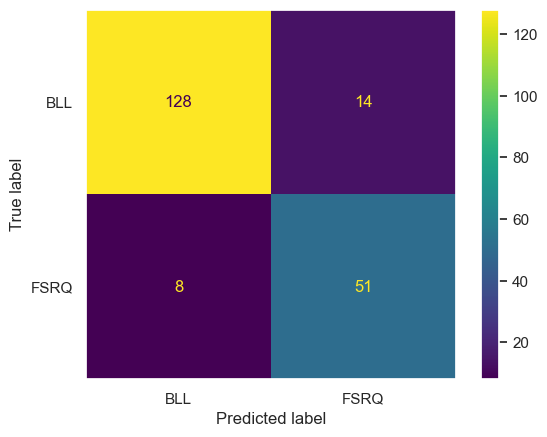

In [8]:
sns.set(style="dark")
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, np.round(predictions))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['BLL', 'FSRQ'])
disp.plot()
plt.show()

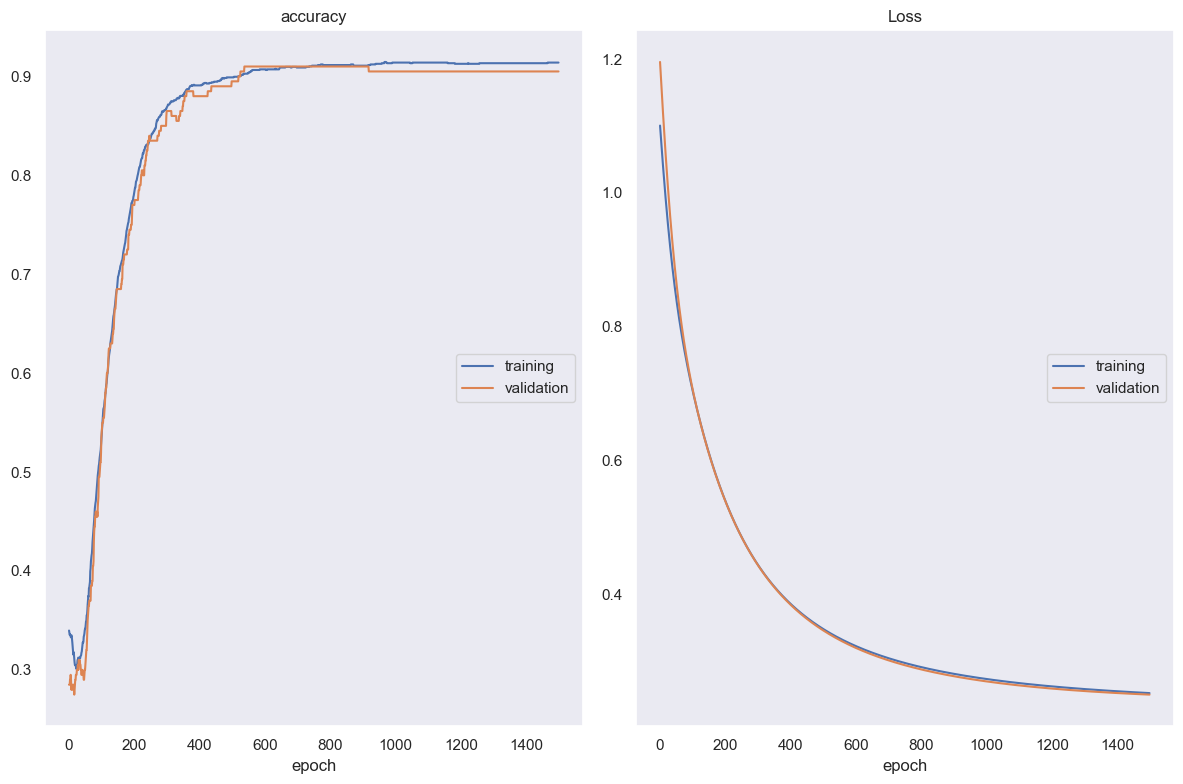

accuracy
	training         	 (min:    0.301, max:    0.915, cur:    0.914)
	validation       	 (min:    0.275, max:    0.910, cur:    0.905)
Loss
	training         	 (min:    0.253, max:    1.101, cur:    0.253)
	validation       	 (min:    0.251, max:    1.196, cur:    0.251)

Epoch 01500: saving model to ./ssl_ckpt_no_dropout\weights_epoch_1500.h5


In [13]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split
import numpy as np

# Define the self-supervised model architecture
input_layer = Input(shape=(7,))
encoder = Dense(128, activation='relu')(input_layer)
encoder = Dense(64, activation='relu')(encoder)
encoded = Dense(32, activation='relu')(encoder)
decoder = Dense(64, activation='relu')(encoded)
decoder = Dense(128, activation='relu')(decoder)
decoded = Dense(7, activation='linear')(decoder)  # Reconstruction layer

# Create the encoder model (used for self-supervised task)
encoder_model = Model(inputs=input_layer, outputs=encoded)

# Create the full self-supervised model (including reconstruction loss)
self_supervised_model = Model(inputs=input_layer, outputs=decoded)

# Compile the self-supervised model with a loss function (reconstruction loss)
self_supervised_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the self-supervised model on the data
self_supervised_model.fit(X_train, X_train, epochs=300, batch_size=2048, validation_data=(X_val, X_val), callbacks=[PlotLossesKeras()])

# Extract encoded features from the encoder model
encoded_features_train = encoder_model.predict(X_train)
encoded_features_val = encoder_model.predict(X_val)

# Now you can use the encoded features as inputs for a classification head
classification_input_layer = Input(shape=(32,))  # Use the appropriate size of encoded features
#classification_input_layer_1 =  tf.keras.layers.Dropout(0.5)(classification_input_layer)
classification_output_layer = Dense(1, activation='sigmoid')(classification_input_layer)

classification_model = Model(inputs=classification_input_layer, outputs=classification_output_layer)
classification_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_path = './ssl_ckpt_no_dropout/' + 'weights_epoch_{epoch:02d}.h5'
ckpt = tf.keras.callbacks.ModelCheckpoint(
        checkpoint_path,
        monitor='val_loss',
        verbose=1,
        save_best_only=False,
        save_weights_only=True,
        mode='min',
        save_freq='epoch'
    )

# Train the classification model on the encoded features
classification_model.fit(encoded_features_train, y_train, epochs=1500, batch_size=2048, validation_data=(encoded_features_val, y_val), callbacks=[PlotLossesKeras(), ckpt])


In [14]:
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score, f1_score, precision_score, recall_score
from tqdm import tqdm
best_auc = 0
best_accuracy = 0
best_f1 = 0
best_f1_0 = 0
best_f1_1 = 0
best_precision = 0
best_pr_0 = 0
best_pr_1 = 0
best_recall = 0
best_r0 = 0
best_r1 = 0
best_weights = {
    'auc': None, 
    'accuracy': None, 
    'f1':None, 
    'f1_0':None, 
    'f1_1':None,
    'precision': None,
    'r0': None,
    'r1': None,
    'pr_0':None,
    'pr_1':None,
    'recall': None
}
encoded_features_test = encoder_model.predict(X_test, verbose=0)
for epoch in tqdm(range(len(os.listdir('./ssl_ckpt_no_dropout/')))):
    weights_path = f"./ssl_ckpt_no_dropout/weights_epoch_{epoch+1:02d}.h5"
    classification_model.load_weights(weights_path)
    
    # Evaluate the model
    predictions = classification_model.predict(encoded_features_test,verbose=0)
    roc_auc = roc_auc_score(y_test, predictions)
    accuracy = accuracy_score(y_test, np.round(predictions))
    f1_0 = f1_score(y_test, np.round(predictions), pos_label=0)
    f1_1 = f1_score(y_test, np.round(predictions), pos_label=1)
    f1 = f1_score(y_test, np.round(predictions), average='weighted')
    precision = precision_score(y_test, np.round(predictions), average='weighted')
    pr_0 = precision_score(y_test, np.round(predictions), pos_label=0)
    pr_1 = precision_score(y_test, np.round(predictions), pos_label=1)
    recall = recall_score(y_test, np.round(predictions), average='weighted')
    r0 = recall_score(y_test, np.round(predictions), pos_label=0)
    r1 = recall_score(y_test, np.round(predictions), pos_label=1)
    
    #accuracy = standard_nn_classifier.evaluate(X_test, y_test, verbose=0)[1]
    
    if roc_auc > best_auc:
        best_auc = roc_auc
        best_weights['auc'] = weights_path
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_weights['accuracy'] = weights_path
    if f1 > best_f1:
        best_f1 = f1
        best_weights['f1'] = weights_path
    if f1_0 > best_f1_0:
        best_f1_0 = f1_0
        best_weights['f1_0'] = weights_path
    if f1_1 > best_f1_1:
        best_f1_1 = f1_1
        best_weights['f1_1'] = weights_path
    if precision > best_precision:
        best_precision = precision
        best_weights['precision'] = weights_path
    if pr_0 > best_pr_0:
        best_pr_0 = pr_0 
        best_weights['pr_0'] = weights_path
    if pr_1 > best_pr_1:
        best_pr_1 = pr_1 
        best_weights['pr_1'] = weights_path
    if r0 > best_r0:
        best_r0 = r0 
        best_weights['r0'] = weights_path
    if r1 > best_r1:
        best_r1 = r1 
        best_weights['r1'] = weights_path
    if recall > best_recall:
        best_recall = recall
        best_weights['recall'] = weights_path

print("Best ROC AUC:", round(best_auc,2))
print("Best accuracy:", round(best_accuracy,2))
print("Best PR(0):", round(best_pr_0,2))
print("Best R(0):", round(best_r0,2))
print("Best F1(0):", round(best_f1_0,2))
print("Best PR(1):", round(best_pr_1,2))
print("Best R(1):", round(best_r1,2))
print("Best F1(1):", round(best_f1_1,2))
print("Best F1:", round(best_f1,2))
print('Best precision:', round(best_precision,2))
print('Best recall:', round(best_recall,2))
print(best_weights)

100%|██████████| 1500/1500 [01:20<00:00, 18.68it/s]

Best ROC AUC: 0.95
Best accuracy: 0.89
Best PR(0): 0.94
Best R(0): 0.89
Best F1(0): 0.92
Best PR(1): 0.77
Best R(1): 0.97
Best F1(1): 0.82
Best F1: 0.89
Best precision: 0.89
Best recall: 0.89
{'auc': './ssl_ckpt_no_dropout/weights_epoch_1481.h5', 'accuracy': './ssl_ckpt_no_dropout/weights_epoch_1297.h5', 'f1': './ssl_ckpt_no_dropout/weights_epoch_1297.h5', 'f1_0': './ssl_ckpt_no_dropout/weights_epoch_1297.h5', 'f1_1': './ssl_ckpt_no_dropout/weights_epoch_1297.h5', 'precision': './ssl_ckpt_no_dropout/weights_epoch_1297.h5', 'r0': './ssl_ckpt_no_dropout/weights_epoch_1297.h5', 'r1': './ssl_ckpt_no_dropout/weights_epoch_01.h5', 'pr_0': './ssl_ckpt_no_dropout/weights_epoch_1297.h5', 'pr_1': './ssl_ckpt_no_dropout/weights_epoch_1297.h5', 'recall': './ssl_ckpt_no_dropout/weights_epoch_1297.h5'}


In [19]:
from sklearn.metrics import roc_auc_score, classification_report
classification_model.load_weights('./ssl_ckpt_no_dropout/weights_epoch_915.h5')
predictions = classification_model.predict(encoded_features_test)
print(roc_auc_score(y_test, predictions))
print(classification_report(y_test, np.round(predictions), digits = 3))

0.9536882310814037
              precision    recall  f1-score   support

           0      0.941     0.894     0.917       142
           1      0.773     0.864     0.816        59

    accuracy                          0.886       201
   macro avg      0.857     0.879     0.866       201
weighted avg      0.891     0.886     0.887       201



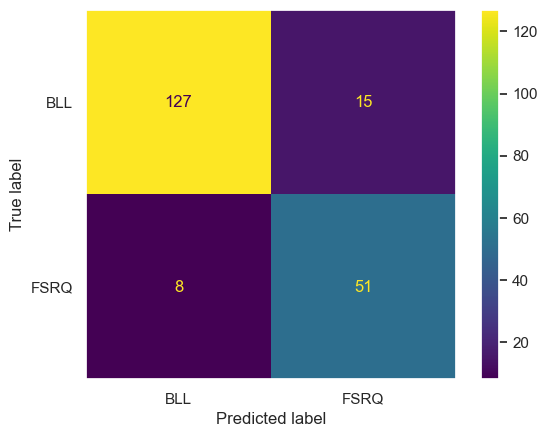

In [17]:
sns.set(style="dark")
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, np.round(predictions))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['BLL', 'FSRQ'])
disp.plot()
plt.show()

In [15]:
from sklearn.metrics import roc_auc_score, classification_report
classification_model.load_weights('./ssl_ckpt_no_dropout/weights_epoch_1297.h5')
predictions = classification_model.predict(encoded_features_test)
print(roc_auc_score(y_test, predictions))
print(classification_report(y_test, np.round(predictions), digits = 3))

0.9511816662687992
              precision    recall  f1-score   support

           0      0.941     0.894     0.917       142
           1      0.773     0.864     0.816        59

    accuracy                          0.886       201
   macro avg      0.857     0.879     0.866       201
weighted avg      0.891     0.886     0.887       201



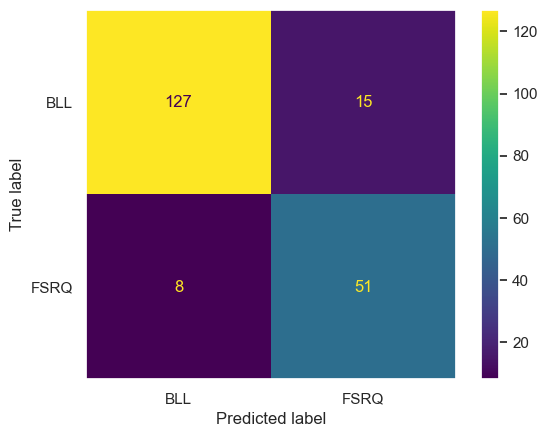

In [16]:
sns.set(style="dark")
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, np.round(predictions))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['BLL', 'FSRQ'])
disp.plot()
plt.show()

## Contrastive Classification


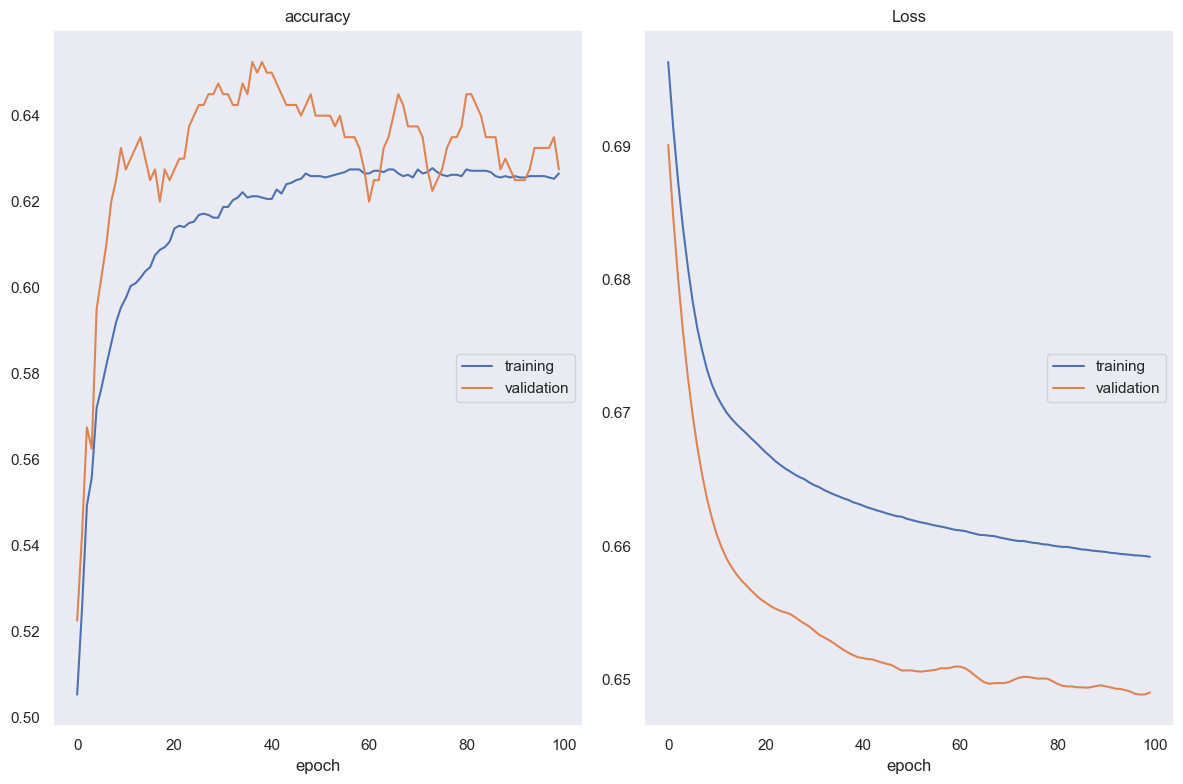

accuracy
	training         	 (min:    0.505, max:    0.628, cur:    0.627)
	validation       	 (min:    0.522, max:    0.652, cur:    0.627)
Loss
	training         	 (min:    0.659, max:    0.696, cur:    0.659)
	validation       	 (min:    0.649, max:    0.690, cur:    0.649)


In [13]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Concatenate
from keras.models import Model
from sklearn.model_selection import train_test_split
import numpy as np


# Create pairs of data samples
def create_pairs(data, labels):
    pairs, pair_labels = [], []
    num_samples = data.shape[0]
    for i in range(num_samples):
        positive_idx = np.where(labels == labels[i])[0]
        negative_idx = np.where(labels != labels[i])[0]

        positive_sample = data[np.random.choice(positive_idx)]
        negative_sample = data[np.random.choice(negative_idx)]

        pairs.append([data[i], positive_sample])
        pair_labels.append(1)  # Positive pair

        pairs.append([data[i], negative_sample])
        pair_labels.append(0)  # Negative pair

    return np.array(pairs), np.array(pair_labels)

pairs_train, pair_labels_train = create_pairs(X_train, y_train)
pairs_val, pair_labels_val = create_pairs(X_val, y_val)

# Define the contrastive classification model architecture
input_a = Input(shape=(7,))
input_b = Input(shape=(7,))
shared_dense = Dense(64, activation='relu')


encoded_a = shared_dense(input_a)
encoded_b = shared_dense(input_b)

merged = Concatenate()([encoded_a, encoded_b])
output_layer = Dense(1, activation='sigmoid')(merged)

contrastive_model = Model(inputs=[input_a, input_b], outputs=output_layer)

# Compile the contrastive classification model
contrastive_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the contrastive classification model on the pairs
contrastive_model.fit([pairs_train[:, 0], pairs_train[:, 1]], pair_labels_train,
                      epochs=100, batch_size=2048,
                      validation_data=([pairs_val[:, 0], pairs_val[:, 1]], pair_labels_val),
                      callbacks=[PlotLossesKeras()]
                      )


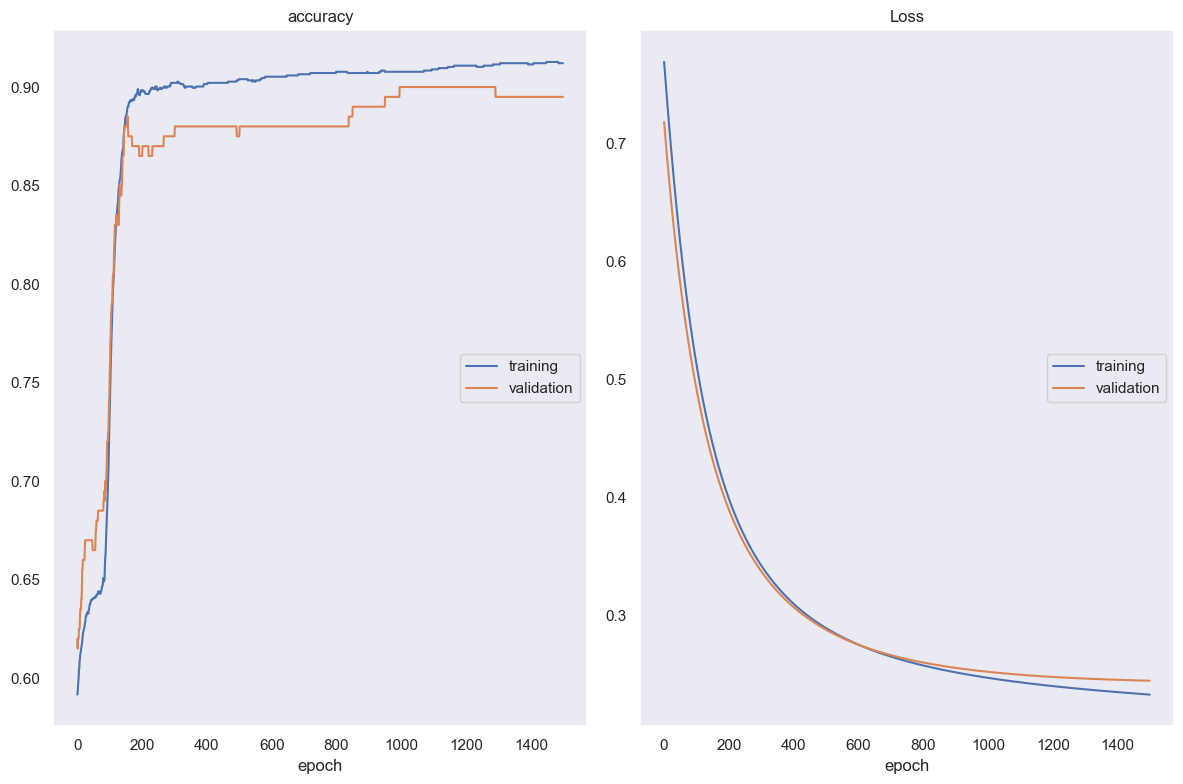

accuracy
	training         	 (min:    0.592, max:    0.913, cur:    0.912)
	validation       	 (min:    0.615, max:    0.900, cur:    0.895)
Loss
	training         	 (min:    0.233, max:    0.769, cur:    0.233)
	validation       	 (min:    0.245, max:    0.718, cur:    0.245)

Epoch 01500: saving model to ./ssl_contrastive_ckpt\weights_epoch_1500.h5


In [14]:
# Extract features from the contrastive classification model
feature_extraction_model = Model(inputs=contrastive_model.input[0], outputs=encoded_a)  # Use one branch as feature extractor
feature_extraction_model.save_weights('./ssl_contrastive.h5')
features_train = feature_extraction_model.predict(X_train, verbose = 0)
features_val = feature_extraction_model.predict(X_val, verbose = 0)

# Build a classification model
classification_input_layer = Input(shape=(64,))  # Adjust the input shape to match the size of the extracted features
classification_output_layer = Dense(1, activation='sigmoid')(classification_input_layer)

classification_model = Model(inputs=classification_input_layer, outputs=classification_output_layer)
classification_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_path = './ssl_contrastive_ckpt/' + 'weights_epoch_{epoch:02d}.h5'
ckpt = tf.keras.callbacks.ModelCheckpoint(
        checkpoint_path,
        monitor='val_loss',
        verbose=1,
        save_best_only=False,
        save_weights_only=True,
        mode='min',
        save_freq='epoch'
    )

# Train the classification model on your labeled data
classification_model.fit(
    features_train, 
    y_train, 
    epochs=1500, 
    batch_size=2048, 
    validation_data=(features_val, y_val),
    callbacks=[PlotLossesKeras(), ckpt])

In [15]:
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score, f1_score, precision_score, recall_score
from tqdm import tqdm
best_auc = 0
best_accuracy = 0
best_f1 = 0
best_f1_0 = 0
best_f1_1 = 0
best_precision = 0
best_pr_0 = 0
best_pr_1 = 0
best_recall = 0
best_r0 = 0
best_r1 = 0
best_weights = {
    'auc': None, 
    'accuracy': None, 
    'f1':None, 
    'f1_0':None, 
    'f1_1':None,
    'precision': None,
    'r0': None,
    'r1': None,
    'pr_0':None,
    'pr_1':None,
    'recall': None
}
encoded_features_test = feature_extraction_model.predict(X_test, verbose=0)
for epoch in tqdm(range(len(os.listdir('./ssl_contrastive_ckpt/')))):
    weights_path = f"./ssl_contrastive_ckpt/weights_epoch_{epoch+1:02d}.h5"
    classification_model.load_weights(weights_path)
    
    # Evaluate the model
    predictions = classification_model.predict(encoded_features_test,verbose=0)
    roc_auc = roc_auc_score(y_test, predictions)
    accuracy = accuracy_score(y_test, np.round(predictions))
    f1_0 = f1_score(y_test, np.round(predictions), pos_label=0)
    f1_1 = f1_score(y_test, np.round(predictions), pos_label=1)
    f1 = f1_score(y_test, np.round(predictions), average='weighted')
    precision = precision_score(y_test, np.round(predictions), average='weighted')
    pr_0 = precision_score(y_test, np.round(predictions), pos_label=0)
    pr_1 = precision_score(y_test, np.round(predictions), pos_label=1)
    recall = recall_score(y_test, np.round(predictions), average='weighted')
    r0 = recall_score(y_test, np.round(predictions), pos_label=0)
    r1 = recall_score(y_test, np.round(predictions), pos_label=1)
    
    #accuracy = standard_nn_classifier.evaluate(X_test, y_test, verbose=0)[1]
    
    if roc_auc > best_auc:
        best_auc = roc_auc
        best_weights['auc'] = weights_path
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_weights['accuracy'] = weights_path
    if f1 > best_f1:
        best_f1 = f1
        best_weights['f1'] = weights_path
    if f1_0 > best_f1_0:
        best_f1_0 = f1_0
        best_weights['f1_0'] = weights_path
    if f1_1 > best_f1_1:
        best_f1_1 = f1_1
        best_weights['f1_1'] = weights_path
    if precision > best_precision:
        best_precision = precision
        best_weights['precision'] = weights_path
    if pr_0 > best_pr_0:
        best_pr_0 = pr_0 
        best_weights['pr_0'] = weights_path
    if pr_1 > best_pr_1:
        best_pr_1 = pr_1 
        best_weights['pr_1'] = weights_path
    if r0 > best_r0:
        best_r0 = r0 
        best_weights['r0'] = weights_path
    if r1 > best_r1:
        best_r1 = r1 
        best_weights['r1'] = weights_path
    if recall > best_recall:
        best_recall = recall
        best_weights['recall'] = weights_path

print("Best ROC AUC:", round(best_auc,2))
print("Best accuracy:", round(best_accuracy,2))
print("Best PR(0):", round(best_pr_0,2))
print("Best R(0):", round(best_r0,2))
print("Best F1(0):", round(best_f1_0,2))
print("Best PR(1):", round(best_pr_1,2))
print("Best R(1):", round(best_r1,2))
print("Best F1(1):", round(best_f1_1,2))
print("Best F1:", round(best_f1,2))
print('Best precision:', round(best_precision,2))
print('Best recall:', round(best_recall,2))
print(best_weights)

  0%|          | 0/1500 [00:00<?, ?it/s]

100%|██████████| 1500/1500 [01:26<00:00, 17.27it/s]

Best ROC AUC: 0.95
Best accuracy: 0.89
Best PR(0): 0.94
Best R(0): 0.99
Best F1(0): 0.92
Best PR(1): 0.91
Best R(1): 0.86
Best F1(1): 0.82
Best F1: 0.89
Best precision: 0.89
Best recall: 0.89
{'auc': './ssl_contrastive_ckpt/weights_epoch_1378.h5', 'accuracy': './ssl_contrastive_ckpt/weights_epoch_890.h5', 'f1': './ssl_contrastive_ckpt/weights_epoch_890.h5', 'f1_0': './ssl_contrastive_ckpt/weights_epoch_890.h5', 'f1_1': './ssl_contrastive_ckpt/weights_epoch_890.h5', 'precision': './ssl_contrastive_ckpt/weights_epoch_890.h5', 'r0': './ssl_contrastive_ckpt/weights_epoch_25.h5', 'r1': './ssl_contrastive_ckpt/weights_epoch_225.h5', 'pr_0': './ssl_contrastive_ckpt/weights_epoch_890.h5', 'pr_1': './ssl_contrastive_ckpt/weights_epoch_99.h5', 'recall': './ssl_contrastive_ckpt/weights_epoch_890.h5'}


In [17]:
from sklearn.metrics import roc_auc_score, classification_report
classification_model.load_weights('./ssl_contrastive_ckpt/weights_epoch_890.h5')
predictions = classification_model.predict(encoded_features_test)
print(roc_auc_score(y_test, predictions))
print(classification_report(y_test, np.round(predictions), digits = 3))

0.9513010264979709
              precision    recall  f1-score   support

           0      0.941     0.894     0.917       142
           1      0.773     0.864     0.816        59

    accuracy                          0.886       201
   macro avg      0.857     0.879     0.866       201
weighted avg      0.891     0.886     0.887       201



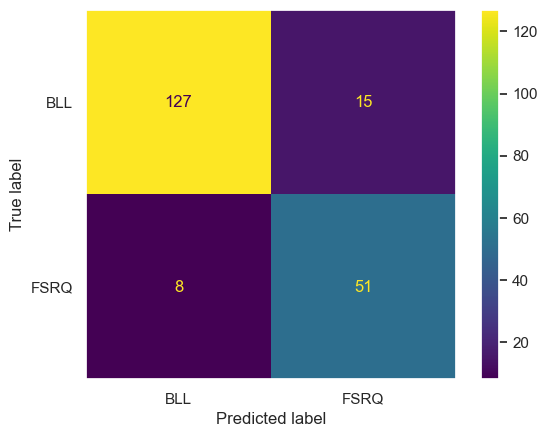

In [18]:
sns.set(style="dark")
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, np.round(predictions))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['BLL', 'FSRQ'])
disp.plot()
plt.show()